# Regeression with Neural Networks

## Topics Covered

- [What is a Regression Problem?](#section1)
- [Inputs and Outputs of neural network regression model](#section2)
- [Sample data generation](#section3)
- [Spliting Sample Data](#section4)
- [Visualizing Train and Test data](#section5)
- [Major steps in modelling with Tensorflow](#section6)
- [Building a Sample Model](#section7)
- [Steps in improving a model with tensorflow](#section8)
- [Models Built](#section9)
  - [Model 1 : First model (1 hidden layer, 100 epochs)](#section9_1)
  - [Model 2 : Complex model (2 hidden layer, 100 epochs)](#section9_2)
  - [Model 3 : Complex model trained for long time (2 hidden layers, 300 epochs)](#section9_3)
  - [Model 4 : Complex model with added activation (2 hidden layers, 1 activation, 300 epochs)](#section9_4)
  - [Model 5 : Complex model with modified learning rate (2 hidden layers, 1 activation, 300 epochs)](#section9_5)
  - [Model 6 : Complex model with adam optimizer (2 hidden layers, 1 activation, 300 epochs)](#section9_6)
  - [Model 7 : More complex model with added hidden layer (2 hidden layers, 2 activation, 300 epochs)](#section9_7)
- [Aggregating Model results](#section10)

### <a name='section1'>What is a Regression Problem?</a>

- **Regression Problem** refers to estimating the relationship between a dependent variable and one or more independent variables

### <a name='section2'>Inputs and Outputs of neural network regression model</a>

- As regression problems aim to predict one variable, the output layer contains just one output.
- The input layer can have one or more inputs.
- Inputs are considered to be the measurements associated with a single example

### <a name='section3'>Sample data generation</a>

In [1]:
import tensorflow as tf 
import numpy as np 
import pandas as pd

np.random.seed(42)
X = np.arange(-200, 200, 4)
y = 0.3*X + 20
len(X), len(y), X[:5], y[:5]

(100,
 100,
 array([-200, -196, -192, -188, -184]),
 array([-40. , -38.8, -37.6, -36.4, -35.2]))

### <a name='section4'>Spliting Sample Data</a>

In [2]:
# Sample data 'X' and 'y' is split into train and test sets in the ratio of 80:20
#from sklearn.model_selection import train_test_split 
X_train = X[:80]
X_test = X[80:]
y_train = y[:80]
y_test = y[80:]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test), X_train[:5], X_test[:5], y_train[:5], y_test[:5]

(80,
 20,
 80,
 20,
 array([-200, -196, -192, -188, -184]),
 array([120, 124, 128, 132, 136]),
 array([-40. , -38.8, -37.6, -36.4, -35.2]),
 array([56. , 57.2, 58.4, 59.6, 60.8]))

### <a name='section5'>Visualizing Train and Test data</a>

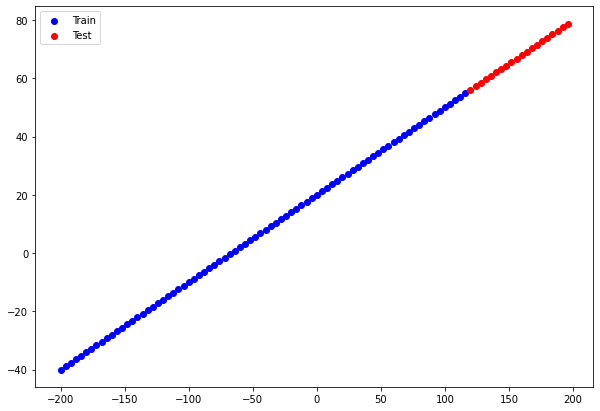

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label='Train')
plt.scatter(X_test, y_test, c='r', label='Test')
plt.legend()
plt.show()

### <a name='section6'>Major steps in Modelling with Tensorflow</a>

The major steps are:

1) **Creating a Model** - A neural network model with desired number of hidden layers is created

2) **Compiling the Model** - This step involves chossing a loss function, optimizer and an evaluation metric

3) **Fitting the Model** - Model is trained with lots of examples (input data)


### <a name='section7'>Building a Sample Model</a>

In [4]:
from tensorflow.python.eager.monitoring import Metric
tf.random.set_seed(42)
# 1. create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(1,), name='output_layer')
], name='Test_model')

# 2. compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])


In [5]:
model.summary()

Model: "Test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


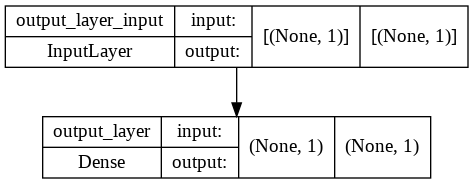

In [6]:
from tensorflow.keras.utils import plot_model 

plot_model(model, show_shapes=True)

In [7]:
# 3. Fitting the data
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
3/3 [==============================] - 1s 4ms/step - loss: 39.9256 - mae: 39.9256
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 21.3473 - mae: 21.3473
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 36.6692 - mae: 36.6692
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 37.7152 - mae: 37.7152
Epoch 5/10
3/3 [==============================] - 0s 7ms/step - loss: 37.7938 - mae: 37.7938
Epoch 6/10
3/3 [==============================] - 0s 4ms/step - loss: 28.1027 - mae: 28.1027
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 35.5723 - mae: 35.5723
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 38.5790 - mae: 38.5790
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 30.7978 - mae: 30.7978
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 42.1122 - mae: 42.1122


In [8]:
y_pred = model.predict(X_test)
y_pred

array([[-21.320938],
       [-22.0357  ],
       [-22.75046 ],
       [-23.46522 ],
       [-24.179981],
       [-24.894741],
       [-25.6095  ],
       [-26.324263],
       [-27.039022],
       [-27.753782],
       [-28.468544],
       [-29.183304],
       [-29.898064],
       [-30.612825],
       [-31.327585],
       [-32.042347],
       [-32.757107],
       [-33.471867],
       [-34.186626],
       [-34.901386]], dtype=float32)

In [9]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, test_predictions=None):

  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', label='Train')
  plt.scatter(test_data, test_labels, c='r', label='Test')
  if test_predictions.any():
    plt.scatter(test_data, test_predictions, c='g', label='Predictions')
  plt.legend()
  plt.show()

In [10]:
y_pred.squeeze()

array([-21.320938, -22.0357  , -22.75046 , -23.46522 , -24.179981,
       -24.894741, -25.6095  , -26.324263, -27.039022, -27.753782,
       -28.468544, -29.183304, -29.898064, -30.612825, -31.327585,
       -32.042347, -32.757107, -33.471867, -34.186626, -34.901386],
      dtype=float32)

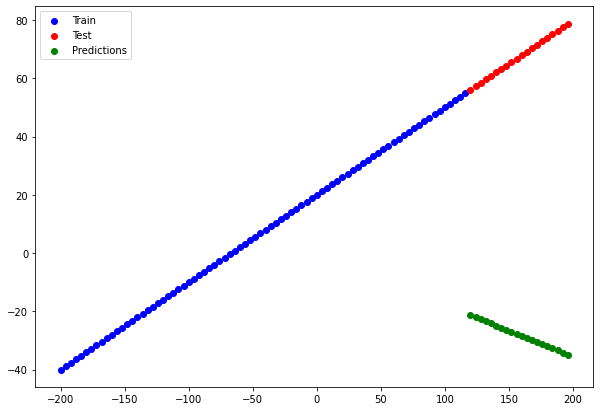

In [11]:
plot_predictions(test_predictions=y_pred.squeeze())

### <a name='section8'>Steps in Improving a model with Tensorflow</a>

- In Model building step,
  - Add more layers
  - Increase the number of neurons,
  - Add or change actiavtion functions
- In model compiling step,
  - Change optimization function,
  - Change learning rate
- In model fitting step,
  - Increase number of samples (i.e fitting on more time)
  - Increase the number of epochs (i.e fitting for more time)


### <a name='section9'>Models Built</a>





Let us consider the following scenarios for builing models
- model_1 : With 1 dense layer, train for a long time (100 epochs)
- model_2 : Build complex model with 2 layers and trian for 100 epochs
- model_3 : Build complex model with 2 layers and train for 300 epochs
- model_4 : Build complex model with 2 layers and 1 actiavtion function, train for 300 epochs
- model_5 : Build complex model with 2 layers, 1 activation function and a lowered learning rate, train for 500 epochs
- model_6 : Build complex model with 2 layers, 1 actiavtion function with **Adam** optimizer, train for 300 epochs
- model_7 : Build more complex model with 3 layers, 2 activation functions with **Adam** optimizer, train for 300 epochs

#### <a name='section9_1'>Model 1</a>

In [12]:
tf.random.set_seed(42)

# 1. create a model 
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, input_shape=(1,), name='output_layer'),
], 'model_1')

# 2. compile the model 
model_1.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
                )


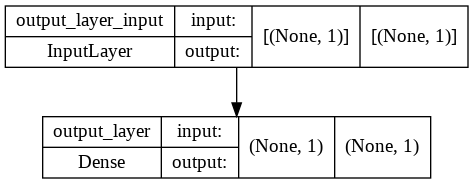

In [13]:
plot_model(model_1, show_shapes=True)

In [14]:
# 3. fit the model
history_model_1 = model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 39.9256 - mae: 39.9256
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 21.3473 - mae: 21.3473
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 36.6692 - mae: 36.6692
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 37.7152 - mae: 37.7152
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 37.7938 - mae: 37.7938
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 28.1027 - mae: 28.1027
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 35.5723 - mae: 35.5723
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 38.5790 - mae: 38.5790
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 30.7978 - mae: 30.7978
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 42.1122 - mae: 42.1122
Epoch 11/100
3/3 [==============================] - 0s 3ms/

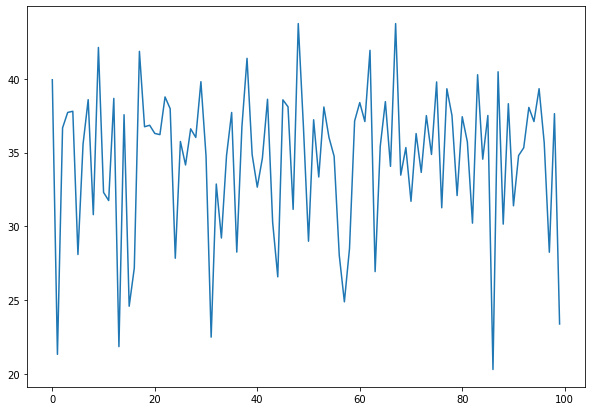

In [15]:
pd.DataFrame(history_model_1.history)['loss'].plot(figsize=(10, 7))

In [16]:
y_pred_1 = model_1.predict(y_test)

In [17]:
y_pred_1.shape

(20, 1)

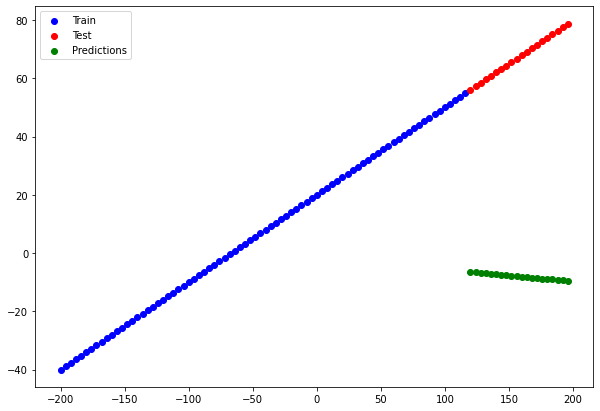

In [18]:
plot_predictions(test_predictions=y_pred_1.squeeze())

In [19]:
def get_mae(ytrue, ypred):
  return tf.metrics.mean_absolute_error(ytrue, ypred).numpy()

def get_mse(ytrue, ypred):
  return tf.metrics.mean_squared_error(ytrue, ypred).numpy()

In [20]:
models = []
maes = []
mses = []

In [21]:
models.append(model_1.name)
maes.append(get_mae(y_test, y_pred_1.squeeze()))
mses.append(get_mse(y_test, y_pred_1.squeeze()))
maes, mses

([75.41795], [5749.6772])

#### <a name='section9_2'>Model 2</a>

In [22]:
tf.random.set_seed(42)

# 1. create a model 
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, input_shape=(1,), name='hidden_1'),
                               tf.keras.layers.Dense(1, name='output_layer'),
], 'model_2')

# 2. compile the model 
model_2.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
                )


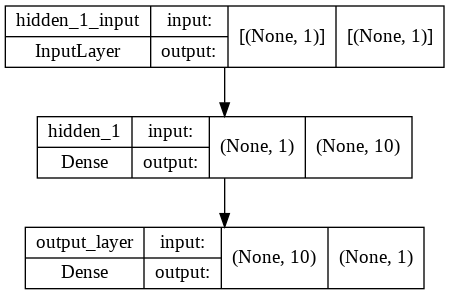

In [23]:
plot_model(model_2, show_shapes=True)

In [24]:

# 3. fit the model
history_model_2 = model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 77.7862 - mae: 77.7862
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 18.2439 - mae: 18.2439
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 22.0676 - mae: 22.0676
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 19.1881 - mae: 19.1881
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 17.6922 - mae: 17.6922
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 17.3643 - mae: 17.3643
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 17.5558 - mae: 17.5558
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 15.4940 - mae: 15.4940
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 17.2872 - mae: 17.2872
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 18.7935 - mae: 18.7935
Epoch 11/100
3/3 [==============================] - 0s 4ms/

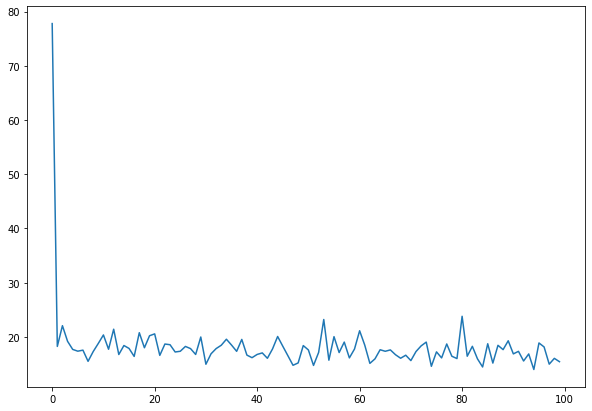

In [25]:
pd.DataFrame(history_model_2.history)['loss'].plot(figsize=(10, 7))

In [26]:
y_pred_2 = model_2.predict(y_test)

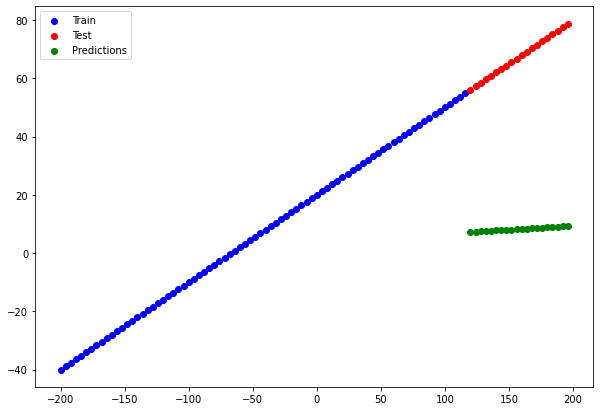

In [27]:
plot_predictions(test_predictions=y_pred_2.squeeze())

In [28]:
models.append(model_2.name)
maes.append(get_mae(y_test, y_pred_2.squeeze()))
mses.append(get_mse(y_test, y_pred_2.squeeze()))
maes, mses

([75.41795, 59.168907], [5749.6772, 3540.6863])

#### <a name='section9_3'>Model 3</a>

In [29]:
tf.random.set_seed(42)

# 1. create a model
model_3 = tf.keras.Sequential([
                              tf.keras.layers.Dense(5, input_shape=(1,), name='hidden_1'),
                              tf.keras.layers.Dense(1, name='output_layer')
], name='model_3')

# 2. compile the model
model_3.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
)


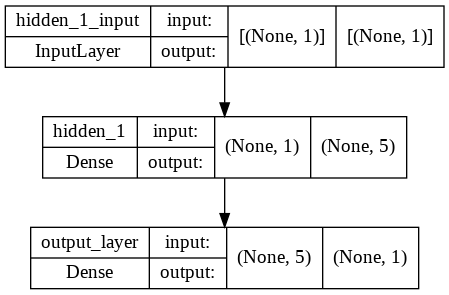

In [30]:
plot_model(model_3, show_shapes=True)

In [31]:
# 3. fit the model
history_model_3 = model_3.fit(X_train, y_train, epochs=300)

Epoch 1/300
3/3 [==============================] - 0s 4ms/step - loss: 73.9313 - mae: 73.9313
Epoch 2/300
3/3 [==============================] - 0s 3ms/step - loss: 19.6528 - mae: 19.6528
Epoch 3/300
3/3 [==============================] - 0s 5ms/step - loss: 21.7281 - mae: 21.7281
Epoch 4/300
3/3 [==============================] - 0s 4ms/step - loss: 18.4713 - mae: 18.4713
Epoch 5/300
3/3 [==============================] - 0s 5ms/step - loss: 20.1636 - mae: 20.1636
Epoch 6/300
3/3 [==============================] - 0s 4ms/step - loss: 18.1989 - mae: 18.1989
Epoch 7/300
3/3 [==============================] - 0s 3ms/step - loss: 17.6822 - mae: 17.6822
Epoch 8/300
3/3 [==============================] - 0s 4ms/step - loss: 17.1651 - mae: 17.1651
Epoch 9/300
3/3 [==============================] - 0s 3ms/step - loss: 17.6288 - mae: 17.6288
Epoch 10/300
3/3 [==============================] - 0s 7ms/step - loss: 17.5013 - mae: 17.5013
Epoch 11/300
3/3 [==============================] - 0s 6ms/

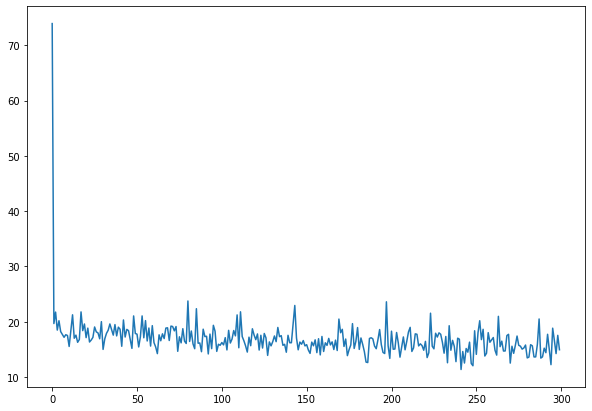

In [32]:
pd.DataFrame(history_model_3.history)['loss'].plot(figsize=(10, 7))

In [33]:
y_pred_3 = model_3.predict(X_test)

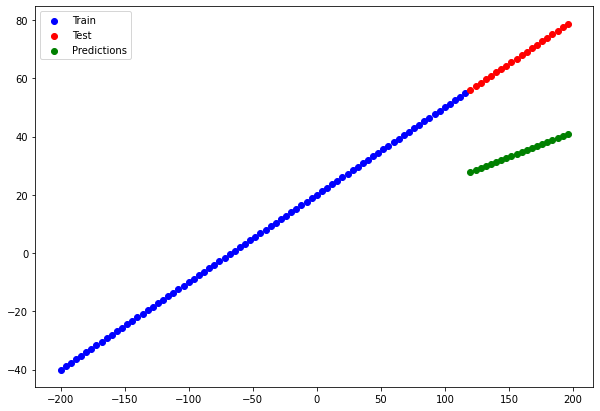

In [34]:
plot_predictions(test_predictions=y_pred_3.squeeze())

In [35]:
models.append(model_3.name)
maes.append(get_mae(y_test, y_pred_3.squeeze()))
mses.append(get_mse(y_test, y_pred_3.squeeze()))
maes, mses

([75.41795, 59.168907, 33.01668], [5749.6772, 3540.6863, 1098.3778])

#### <a name='section9_4'>Model 4</a>

In [36]:
tf.random.set_seed(42)
# 1. create model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(5, input_shape=(1,), activation='relu', name='hidden_1'),
                               tf.keras.layers.Dense(1, name='output_layer')
], name='model_4')

# compile model
model_4.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

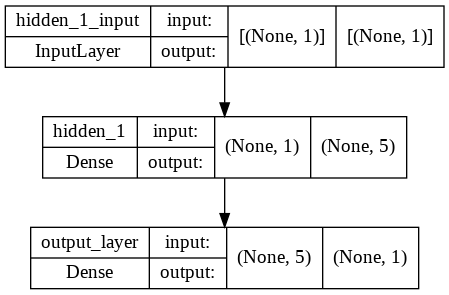

In [37]:
plot_model(model_4, show_shapes=True)

In [38]:
# 3. fit the model
history_model_4 = model_4.fit(X_train, y_train, epochs=300)

Epoch 1/300
3/3 [==============================] - 0s 6ms/step - loss: 42.0125 - mae: 42.0125
Epoch 2/300
3/3 [==============================] - 0s 6ms/step - loss: 10.7656 - mae: 10.7656
Epoch 3/300
3/3 [==============================] - 0s 5ms/step - loss: 14.4821 - mae: 14.4821
Epoch 4/300
3/3 [==============================] - 0s 6ms/step - loss: 13.0594 - mae: 13.0594
Epoch 5/300
3/3 [==============================] - 0s 4ms/step - loss: 8.8092 - mae: 8.8092
Epoch 6/300
3/3 [==============================] - 0s 4ms/step - loss: 9.9565 - mae: 9.9565
Epoch 7/300
3/3 [==============================] - 0s 4ms/step - loss: 14.0559 - mae: 14.0559
Epoch 8/300
3/3 [==============================] - 0s 4ms/step - loss: 10.5705 - mae: 10.5705
Epoch 9/300
3/3 [==============================] - 0s 4ms/step - loss: 10.3777 - mae: 10.3777
Epoch 10/300
3/3 [==============================] - 0s 3ms/step - loss: 11.8744 - mae: 11.8744
Epoch 11/300
3/3 [==============================] - 0s 5ms/step

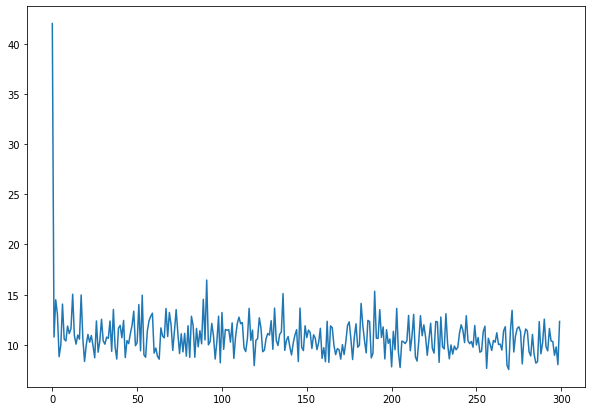

In [39]:
pd.DataFrame(history_model_4.history)['loss'].plot(figsize=(10,7))

In [40]:
y_pred_4 = model_4.predict(X_test)

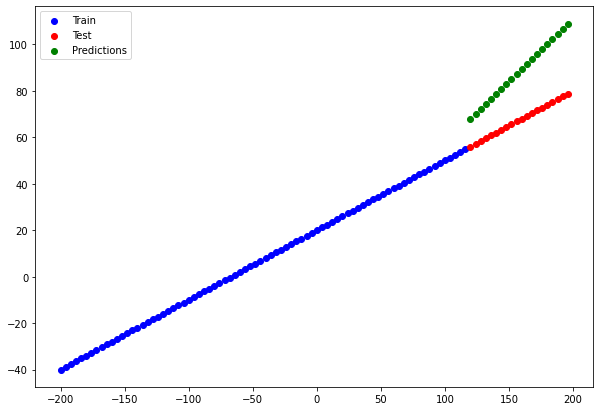

In [41]:
plot_predictions(test_predictions=y_pred_4.squeeze())

In [42]:
models.append(model_4.name)
maes.append(get_mae(y_test, y_pred_4.squeeze()))
mses.append(get_mse(y_test, y_pred_4.squeeze()))
maes, mses

([75.41795, 59.168907, 33.01668, 21.00669],
 [5749.6772, 3540.6863, 1098.3778, 471.98175])

#### <a name='section9_5'>Model 5</a>

In [43]:
tf.random.set_seed(42)
# 1. create model
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(5, input_shape=(1,), activation='relu', name='hidden_1'),
                               tf.keras.layers.Dense(1, name='output_layer')
], name='model_5')

# compile model
model_5.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['mae'])

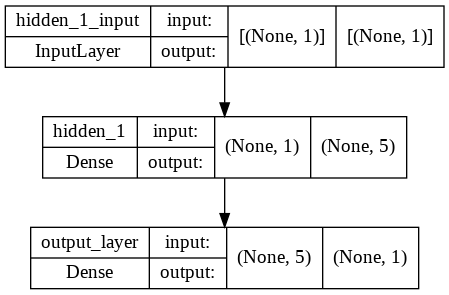

In [44]:
plot_model(model_5, show_shapes=True)

In [45]:
# fit the model
history_model_5 = model_5.fit(X_train, y_train, epochs=500)

Epoch 1/500
3/3 [==============================] - 0s 3ms/step - loss: 54.3864 - mae: 54.3864
Epoch 2/500
3/3 [==============================] - 0s 3ms/step - loss: 33.4431 - mae: 33.4431
Epoch 3/500
3/3 [==============================] - 0s 3ms/step - loss: 17.6006 - mae: 17.6006
Epoch 4/500
3/3 [==============================] - 0s 5ms/step - loss: 13.3043 - mae: 13.3043
Epoch 5/500
3/3 [==============================] - 0s 4ms/step - loss: 11.3713 - mae: 11.3713
Epoch 6/500
3/3 [==============================] - 0s 3ms/step - loss: 9.8049 - mae: 9.8049
Epoch 7/500
3/3 [==============================] - 0s 4ms/step - loss: 8.4288 - mae: 8.4288
Epoch 8/500
3/3 [==============================] - 0s 4ms/step - loss: 8.3063 - mae: 8.3063
Epoch 9/500
3/3 [==============================] - 0s 4ms/step - loss: 8.3390 - mae: 8.3390
Epoch 10/500
3/3 [==============================] - 0s 4ms/step - loss: 8.2797 - mae: 8.2797
Epoch 11/500
3/3 [==============================] - 0s 3ms/step - los

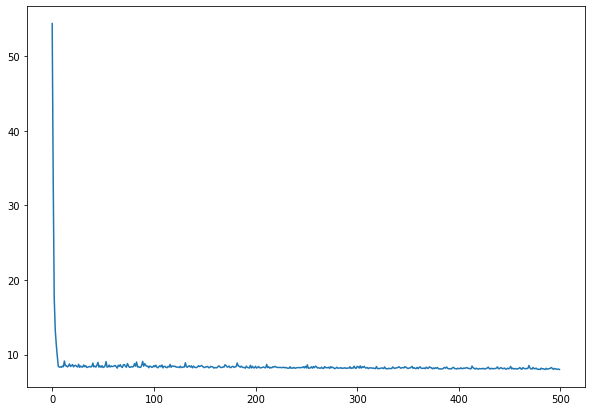

In [46]:
pd.DataFrame(history_model_5.history)['loss'].plot(figsize=(10, 7))

In [47]:
y_pred_5 = model_5.predict(X_test)

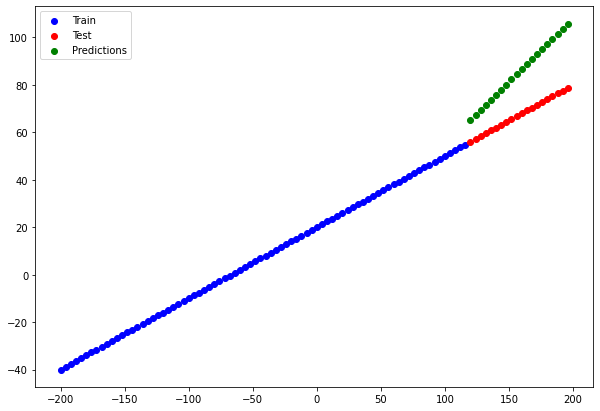

In [48]:
plot_predictions(test_predictions=y_pred_5.squeeze())

In [49]:
models.append(model_5.name)
maes.append(get_mae(y_test, y_pred_5.squeeze()))
mses.append(get_mse(y_test, y_pred_5.squeeze()))
maes, mses

([75.41795, 59.168907, 33.01668, 21.00669, 18.062374],
 [5749.6772, 3540.6863, 1098.3778, 471.98175, 355.7539])

#### <a name='section9_6'>Model 6</a>

In [50]:
tf.random.set_seed(42)
# 1. create model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(5, input_shape=(1,), activation='relu', name='hidden_1'),
                               tf.keras.layers.Dense(1, name='output_layer')
], name='model_6')

# compile model
model_6.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

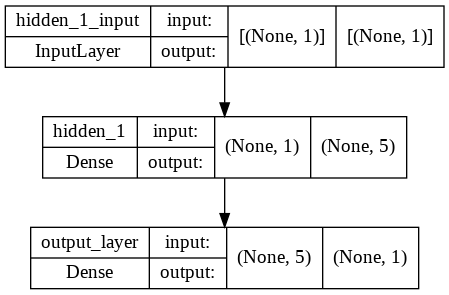

In [51]:
plot_model(model_6, show_shapes=True)

In [52]:
# fit
history_model_6 = model_6.fit(X_train, y_train, epochs=300)

Epoch 1/300
3/3 [==============================] - 0s 4ms/step - loss: 60.0943 - mae: 60.0943
Epoch 2/300
3/3 [==============================] - 0s 6ms/step - loss: 59.3975 - mae: 59.3975
Epoch 3/300
3/3 [==============================] - 0s 3ms/step - loss: 58.8249 - mae: 58.8249
Epoch 4/300
3/3 [==============================] - 0s 4ms/step - loss: 58.1679 - mae: 58.1679
Epoch 5/300
3/3 [==============================] - 0s 4ms/step - loss: 57.5536 - mae: 57.5536
Epoch 6/300
3/3 [==============================] - 0s 5ms/step - loss: 56.8891 - mae: 56.8891
Epoch 7/300
3/3 [==============================] - 0s 4ms/step - loss: 56.2403 - mae: 56.2403
Epoch 8/300
3/3 [==============================] - 0s 4ms/step - loss: 55.6170 - mae: 55.6170
Epoch 9/300
3/3 [==============================] - 0s 4ms/step - loss: 54.9340 - mae: 54.9340
Epoch 10/300
3/3 [==============================] - 0s 4ms/step - loss: 54.3152 - mae: 54.3152
Epoch 11/300
3/3 [==============================] - 0s 6ms/

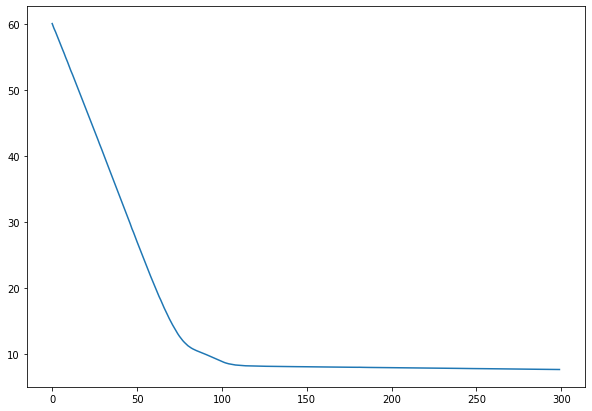

In [53]:
pd.DataFrame(history_model_6.history)['loss'].plot(figsize=(10, 7))

In [54]:
y_pred_6 = model_6.predict(X_test)

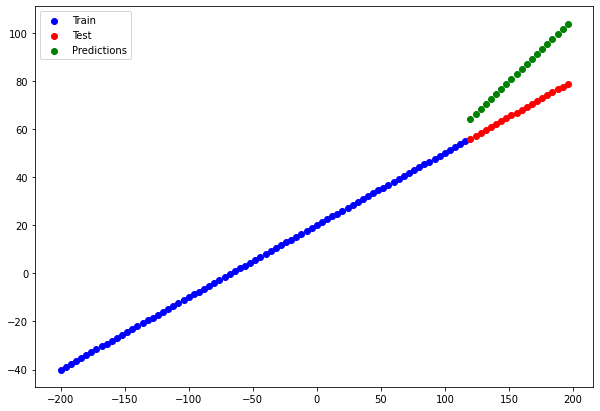

In [55]:
plot_predictions(test_predictions=y_pred_6.squeeze())

In [56]:
models.append(model_6.name)
maes.append(get_mae(y_test, y_pred_6.squeeze()))
mses.append(get_mse(y_test, y_pred_6.squeeze()))
maes, mses

([75.41795, 59.168907, 33.01668, 21.00669, 18.062374, 16.496174],
 [5749.6772, 3540.6863, 1098.3778, 471.98175, 355.7539, 298.52374])

#### <a name='section9_7'>Model 7</a>

In [57]:
tf.random.set_seed(42)
# 1. create model
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, input_shape=(1,), activation='relu', name='hidden_1'),
                               tf.keras.layers.Dense(5, activation='relu', name='hidden_2'),
                               tf.keras.layers.Dense(1, name='output_layer')
], name='model_7')

# compile model
model_7.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

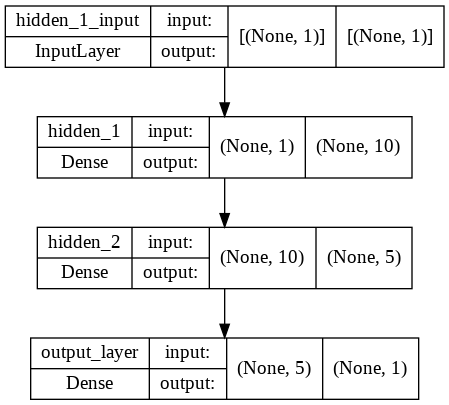

In [58]:
plot_model(model_7, show_shapes=True)

In [59]:
# 3. fit the model
history_model_7 = model_7.fit(X_train, y_train, epochs=300)

Epoch 1/300
3/3 [==============================] - 0s 4ms/step - loss: 31.0651 - mae: 31.0651
Epoch 2/300
3/3 [==============================] - 0s 3ms/step - loss: 30.2309 - mae: 30.2309
Epoch 3/300
3/3 [==============================] - 0s 4ms/step - loss: 29.6128 - mae: 29.6128
Epoch 4/300
3/3 [==============================] - 0s 5ms/step - loss: 29.0675 - mae: 29.0675
Epoch 5/300
3/3 [==============================] - 0s 4ms/step - loss: 28.5911 - mae: 28.5911
Epoch 6/300
3/3 [==============================] - 0s 5ms/step - loss: 28.2169 - mae: 28.2169
Epoch 7/300
3/3 [==============================] - 0s 4ms/step - loss: 27.9660 - mae: 27.9660
Epoch 8/300
3/3 [==============================] - 0s 4ms/step - loss: 27.7088 - mae: 27.7088
Epoch 9/300
3/3 [==============================] - 0s 3ms/step - loss: 27.4347 - mae: 27.4347
Epoch 10/300
3/3 [==============================] - 0s 3ms/step - loss: 27.1082 - mae: 27.1082
Epoch 11/300
3/3 [==============================] - 0s 4ms/

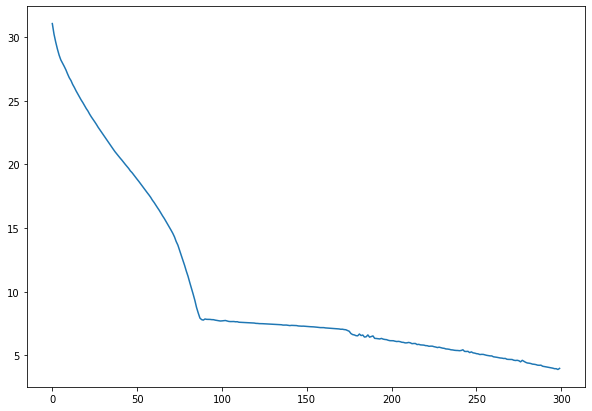

In [60]:
pd.DataFrame(history_model_7.history)['loss'].plot(figsize=(10, 7))

In [61]:
y_pred_7 = model_7.predict(X_test)

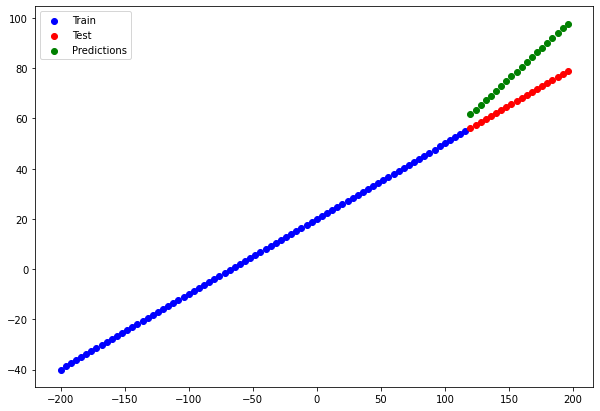

In [62]:
plot_predictions(test_predictions=y_pred_7.squeeze())

In [63]:
models.append(model_7.name)
maes.append(get_mae(y_test, y_pred_7.squeeze()))
mses.append(get_mse(y_test, y_pred_7.squeeze()))
maes, mses

([75.41795, 59.168907, 33.01668, 21.00669, 18.062374, 16.496174, 12.176808],
 [5749.6772, 3540.6863, 1098.3778, 471.98175, 355.7539, 298.52374, 165.03976])

### <a name='section10'>Aggregating Model results</a>

In [65]:
results_df = pd.DataFrame({'models':models, 'mae':maes, 'mse':mses})
results_df

,models,mae,mse
0,model_1,75.417953,5749.677246
1,model_2,59.168907,3540.686279
2,model_3,33.016682,1098.377808
3,model_4,21.006689,471.981750
4,model_5,18.062374,355.753906
5,model_6,16.496174,298.523743
6,model_7,12.176808,165.039764


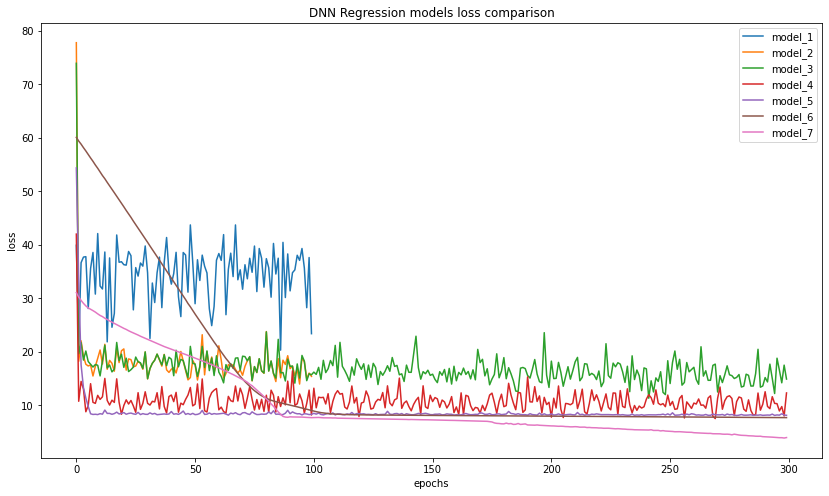

In [74]:
plt.figure(figsize=(14,8))
#x = range(0, 500)

plt.plot(history_model_1.history['loss'], label='model_1')
plt.plot(history_model_2.history['loss'], label='model_2')
plt.plot(history_model_3.history['loss'], label='model_3')
plt.plot(history_model_4.history['loss'], label='model_4')
plt.plot(history_model_5.history['loss'][:300], label='model_5')
plt.plot(history_model_6.history['loss'], label='model_6')
plt.plot(history_model_7.history['loss'], label='model_7')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('DNN Regression models loss comparison')
plt.legend()
plt.show()